# 最小値探索法の実装

In [1]:
#!/usr/local/lib/anaconda3/bin/python
# -*- coding: utf-8 -*-
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import csv
import scipy.optimize as spo

## 降下法

In [ ]:
#Gradient descent
N = 100
A = np.ones((N,N))
for i in range(N):
    for j in range(i+1,N):
        A[i,j]=A[i,j]/2**(j-i)
for i in range(N):
    for j in range(i):
        A[i,j]=A[j,i]
b = np.arange(1,N+1)
print(A,b)
E=[]
x0 = b
r = b - A@x0
p = r
for k in range(10000):
    a = np.dot(p,r)/np.dot(p,A@p)
    x = x0 + a*p
    r = b - A@x
    p = r
    x0 = x
    #print(a,x,r)
    err = np.sqrt(np.dot(r,r))
    E.append(err)
    if(err<1e-7):
        print(k,x)
        break
plt.plot(E)
plt.show()
print(A@x)

## 共役勾配法

In [ ]:
#Conjucate Gradient
N = 20
A = np.ones((N,N))
for i in range(N):
    for j in range(i+1,N):
        A[i,j]=A[i,j]/4**(j-i)
for i in range(N):
    for j in range(i):
        A[i,j]=A[j,i]
b = np.arange(N)
print(A,b)
E=[]
x0 = b
r0 = b - A@x0
p0 = r0
for k in range(10000):
    a = np.dot(p0,r0)/np.dot(p0,A@p0)
    x = x0 + a*p0
    r = r0 - a*A@p0
    err = np.sqrt(np.dot(r,r))
    #print(err)
    E.append(err)
    if(err<1e-7):
        print(k,x)
        break
    y = r-r0
    beta = -np.dot(r,y)/np.dot(p0,y)
    p = r + beta*p0
    
    x0 = x
    p0 = p
    r0 = r
plt.plot(E)
plt.show()
print(A@x-b)

## 一次元探索法
### 黄金分割法

In [ ]:
def f(x):
    return x**2-4*x+9

def golden_section():
    a0=-10
    b0=10
    t = 0.618 #golden_ratio
    a=a0
    b=b0
    c1=(a+b)/2-1
    c2=(a+b)/2+1
    num=0
    print(num,a,b,c1,c2,abs(b-a))
    for k in range(1000):
        num+=1
        #x1 = x0 - c1*G0@jacobi(x0)
        f1 = f(c1)
        #x2 = x0 - c2*G0@jacobi(x0)
        f2 = f(c2)
        if(f2>f1):
            a=a
            b=c2
            c2_=c1
            c1_=a+(1-t)*(b-a)
        else:
            a=c1
            b=b
            c1_=c2
            c2_=b-(1-t)*(b-a)
        if(abs(b-a)<0.0001):
            print("end")
            break
        c1 = min(c1_,c2_)
        c2 = max(c1_,c2_)
        print(num,a,b,c1,c2,abs(b-a))
    return a

a = golden_section()
print(a)

### アルミホ法

In [ ]:
def almiho(d0,x0,df0,*args):
    alpha=0.0001
    beta=0.5
    f1 = J(x0,*args)
    dfd = df0@d0
    print(dfd)
    l = 0
    while l<100:
        tk = beta**l
        lim = alpha*tk*dfd
        x = x0 + tk*d0
        f2 = J(x,*args)
        print("f2-f1",f2-f1,"lim",lim)
        if(f2-f1<=lim):
            print("end",tk)
            break
        l+=1
    else:
        print("!!failed to converge in almiho!!",tk)
    return tk

## Himmelblau方程式を用いた準ニュートン法と共役勾配法の比較

[-0.83669297  6.39010026] [-29.26705572 298.0463814 ]
[[18436.89424833 18435.89424833]
 [18435.89424833 18436.89424833]]
[3.24125789 3.24111198] [932.26990698 613.39747396]
[[1.38834057e+08 1.38834056e+08]
 [1.38834056e+08 1.38834057e+08]]
[3604919.59021315 3604919.58474677] [1.87391213e+20 1.87391026e+20]
[[1.5005771e+36 1.5005771e+36]
 [1.5005771e+36 1.5005771e+36]]
[9.38361976e+51 9.38361976e+51] [3.30499796e+156 3.30499796e+156]
[[7.44594618e+245 7.44594618e+245]
 [7.44594618e+245 7.44594618e+245]]
[-inf -inf] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan na

<ipython-input-3-0342098bad28>:124: RuntimeWarning: overflow encountered in square
  if(np.sqrt(np.sum(jacobi(x)**2))<0.001):
<ipython-input-3-0342098bad28>:90: RuntimeWarning: overflow encountered in matmul
  x1 = x0 - c1*G0@jacobi(x0)
<ipython-input-3-0342098bad28>:93: RuntimeWarning: overflow encountered in matmul
  x2 = x0 - c2*G0@jacobi(x0)
<ipython-input-3-0342098bad28>:13: RuntimeWarning: invalid value encountered in double_scalars
  return (x**2+y-11)**2+(x+y**2-7)**2
<ipython-input-3-0342098bad28>:121: RuntimeWarning: overflow encountered in matmul
  x = x0 - alpha*G0@jacobi(x0)
<ipython-input-3-0342098bad28>:23: RuntimeWarning: invalid value encountered in double_scalars
  dx = 4*x[0]**3 + 4*x[0]*x[1] - 42*x[0] +2*x[1]**2 -14
<ipython-input-3-0342098bad28>:24: RuntimeWarning: invalid value encountered in double_scalars
  dy = 2*x[0]**2 + 4*x[0]*x[1] + 4*x[1]**3 -26*x[1] -22


 [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]


[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [nan nan]
[[nan nan]
 [nan nan]]
[nan nan] [

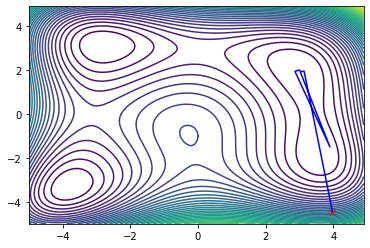

In [3]:
delta = 0.1
minXY=-5.0
maxXY=5.0
nContour=50
alpha=0.01

def J(x,y):
    u"""
    Himmelblau's function
    see Himmelblau's function - Wikipedia, the free encyclopedia 
    http://en.wikipedia.org/wiki/Himmelblau%27s_function
    """
    return (x**2+y-11)**2+(x+y**2-7)**2

def CreateMeshData():
    x = np.arange(minXY, maxXY, delta)
    y = np.arange(minXY, maxXY, delta)
    X, Y = np.meshgrid(x, y)
    Z=[J(x,y) for (x,y) in zip(X,Y)]
    return(X,Y,Z)

def jacobi(x):
    dx = 4*x[0]**3 + 4*x[0]*x[1] - 42*x[0] +2*x[1]**2 -14
    dy = 2*x[0]**2 + 4*x[0]*x[1] + 4*x[1]**3 -26*x[1] -22
    return np.array([dx,dy])

def golden_section(x0,d0):
    a0=-10
    b0=10
    t = 0.618 #golden_ratio
    a=a0
    b=b0
    c1=(a+b)/2-1
    c2=(a+b)/2+1
    num=0
    #print(num,a,b,c1,c2,abs(b-a))
    for k in range(1000):
        num+=1
        x1 = x0 + c1*d0
        f1 = J(x1[0],x1[1])
        x2 = x0 + c2*d0
        f2 = J(x2[0],x2[1])
        if(f2>f1):
            a=a
            b=c2
            c2_=c1
            c1_=a+(1-t)*(b-a)
        else:
            a=c1
            b=b
            c1_=c2
            c2_=b-(1-t)*(b-a)
        if(abs(b-a)<0.0001):
            #print(num,"end")
            break
        c1 = min(c1_,c2_)
        c2 = max(c1_,c2_)
        #print(num,a,b,c1,c2,abs(b-a))
    return a

def CG(start):
    result=[start]
    x0 = start
    d0 = -jacobi(x0)
    for k in range(10000):
        alpha = golden_section(x0,d0)
        x = x0 + alpha*d0
        result.append(x)
        d = jacobi(x)
        if(np.sqrt(np.sum(d**2))<0.001):
            print(k,"end")
            break
        p = -d + (np.dot(d.T,d)/np.dot(d0.T,d0))*d0
        x0 = x
        d0 = p
    return result

def golden_section_N(x0,G0):
    a0=-10
    b0=10
    t = 0.618 #golden_ratio
    a=a0
    b=b0
    c1=(a+b)/2-1
    c2=(a+b)/2+1
    num=0
    #print(num,a,b,c1,c2,abs(b-a))
    for k in range(1000):
        num+=1
        x1 = x0 - c1*G0@jacobi(x0)
        f1 = J(x1[0],x1[1])
        #f1 = f(c1)
        x2 = x0 - c2*G0@jacobi(x0)
        f2 = J(x2[0],x2[1])
        #f2 = f(c2)
        if(f2>f1):
            a=a
            b=c2
            c2_=c1
            c1_=a+(1-t)*(b-a)
        else:
            a=c1
            b=b
            c1_=c2
            c2_=b-(1-t)*(b-a)
        if(abs(b-a)<0.0001):
            #print(num,"end")
            break
        c1 = min(c1_,c2_)
        c2 = max(c1_,c2_)
        #print(num,a,b,c1,c2,abs(b-a))
    return a  

def quasi_Newton(start):
    I=np.eye(2)
    G0=np.eye(2)
    x0 = start
    result=[start]
    for k in range(10000):
        alpha = golden_section_N(x0,G0)
        x = x0 - alpha*G0@jacobi(x0)
        
        result.append(x)
        if(np.sqrt(np.sum(jacobi(x)**2))<0.001):
            print(k,"end")
            break
        p0 = x - x0
        q0 = jacobi(x) - jacobi(x0)
        print(p0,q0)
        #p0 = p0.reshape(-1,1)
        #q0 = q0.reshape(-1,1)
        G = (I - p0@q0.T/q0.T@p0)@G0@(I - q0@p0.T/q0.T@p0) + p0@p0.T/q0.T@p0
        print(G)
        G0 = G
        x0 = x
        
    return result
        
start=np.array([random.uniform(minXY,maxXY),random.uniform(minXY,maxXY)])

resultn=quasi_Newton(start)
resultc=CG(start)
(X,Y,Z)=CreateMeshData()
CS = plt.contour(X, Y, Z,nContour)
#  plt.clabel(CS, inline=1, fontsize=10)
#  plt.title('Simplest default with labels')

plt.plot(start[0],start[1],"xr");

if(len(resultn)<1000):
    optX=[x[0] for x in resultn]
    optY=[x[1] for x in resultn]
    plt.plot(optX,optY,"-r");

optX=[x[0] for x in resultc]
optY=[x[1] for x in resultc]
plt.plot(optX,optY,"-b");

plt.show()

## OIと3DVarの比較実験

In [ ]:
#Optimal Interpolation
def L96(Xa,F):
    N=len(Xa)
    
    F_ = (np.roll(Xa, -1) - np.roll(Xa, 2)) * np.roll(Xa, 1) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    N=len(Xa)
    #K1=np.linspace(1,N,N)
    #K2=np.linspace(1,N,N)
    #K3=np.linspace(1,N,N)
    #K4=np.linspace(1,N,N)
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

def H3(X,mask):
    X_=X[mask]
    return np.sqrt(X_*X_)
def H3_t(X,dX,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Ht = H[mask]
    return Ht@dX
def H3_adj(X,dY,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Hadj = H[mask].T
    return Hadj@dY

def Forecast(Xa,B):
    h = 0.05
    F = 8.0
    a = 1.1
    
    Xf = Rungekutta4(Xa,h,F)
    #カルマンフィルターでは時間発展する、3次元変分法では定数
    Pf = B
    
    return Xf,Pf

def Analysis(Xf,Pf,y):
    H = np.eye(N)
    H2 = H/2 + np.roll(H,1,axis=1)/2
    mask = y>=0
    y_ = y[mask]
    e = np.ones(N)
    p = int(np.sum(e[mask]))
    R = np.eye(p)
    #R = np.eye(N)
    I = np.eye(N)
    
    
    #d = y - H2 @ Xf
    d = y_ - H3(Xf,mask)
    R_inv=np.linalg.inv(R)
    B_inv=np.linalg.inv(Pf)
    
    Ex = np.eye(N)
    Ey = np.eye(p)
    H3t=np.zeros((N,p))
    H3adj=np.zeros((p,N))
    for i in range(N):
        H3t[i] = H3_t(Xf,Ex[i],mask)
    for i in range(p):
        H3adj[i] = H3_adj(Xf,Ey[i],mask)
    H3t = H3t.T
    H3adj = H3adj.T
    #print(H3t,H3adj)
    
    A = B_inv + H3adj @ R_inv @ H3t
    
    #Xa = Xf + np.linalg.inv(B_inv + H2.T @ R_inv @ H2) @ H2.T @ R_inv @ d
    Xa = Xf + np.linalg.inv(A) @ H3adj @ R_inv @ d
    
    return Xa


t = 1460
N = 40
h = 0.05 
F = 8.0

X = []
P = []
Pt2 = []
P2 = []
errcov = []

dataset = pd.read_csv("observation_data3.csv")
y = dataset.values
y = y.reshape(1460,N)
dataset2 = pd.read_csv("data3.csv")
Xt = dataset2.values.reshape(t,N)

#初期値
Xa = np.random.randn(N)
X0 = Xa
for j in range(500):
    Xa = Rungekutta4(X0,h,F)
    X0 = Xa
B = np.eye(N) * 0.2
#B = L*0.2
#print(Xa)
#print(B)
#X.append(Xa
    


for k in range(t):
    (Xf,Pf) = Forecast(Xa,B)
    Xa = Analysis(Xf,Pf,y[k,:])
    X.append(Xa)
    if(k%100==0):
        print(k)
    
Xa = np.array(X)
#print(Xa)

C1 = []
C2 = []
H = np.eye(N)
H2 = H/2 + np.roll(H,1,axis=1)/2
for i in range(1460):
    X1 = Xa[i]
    X2 = Xt[i]
    X3 = sum((X2-X1)*(X2-X1))/N
    Y1 = y[i]
    mask = Y1>=0
    Y1 = Y1[mask]
    e = np.ones(N)
    p = int(np.sum(e[mask]))
    #Y2 = sum((H2@X2-Y1)*(H2@X2-Y1))/N
    Y2 = sum((H3(X2,mask)-Y1)*(H3(X2,mask)-Y1))/p
    rmse1 = np.sqrt(X3)
    rmse2 = np.sqrt(Y2)
    C1.append(rmse1)
    C2.append(rmse2)
plt.plot(C1,label="analysis")
plt.plot(C2,label="observation")
#plt.plot(errcov,label="Pa")
plt.legend()
plt.title("RMSE")
#plt.savefig("KFrmse2.jpg")
plt.show()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1.2491653631082338


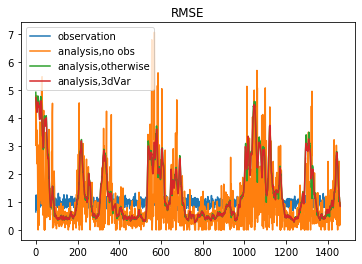

3dVar_abs_rmse_contour.jpg


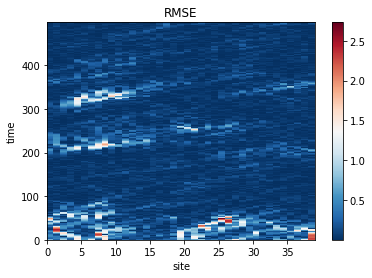

3dVar_abs_ncontour.jpg


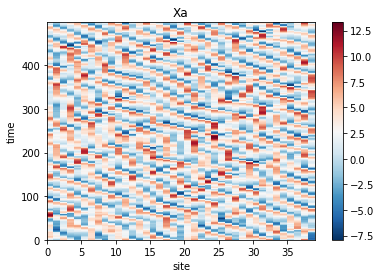

In [2]:
#3dVar
def L96(Xa,F):
    N=len(Xa)
    
    F_ = (np.roll(Xa, -1) - np.roll(Xa, 2)) * np.roll(Xa, 1) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    N=len(Xa)
    #K1=np.linspace(1,N,N)
    #K2=np.linspace(1,N,N)
    #K3=np.linspace(1,N,N)
    #K4=np.linspace(1,N,N)
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

#Gradient descent
def GD(A,b):
    x0 = b
    r = b - A@x0
    p = r
    for k in range(10000):
        a = np.dot(p,r)/np.dot(p,A@p)
        x = x0 + a*p
        r = b - A@x
        p = r
        x0 = x
        #print(a,x,r)
        err = np.sqrt(np.dot(r,r))
        if(err<1e-7):
            break
    return x

#Conjucate Gradient
def CG(A,b):
    x0 = b
    r0 = b - A@x0
    p0 = r0
    for k in range(10000):
        a = np.dot(p0,r0)/np.dot(p0,A@p0)
        x = x0 + a*p0
        r = r0 - a*A@p0
        err = np.sqrt(np.dot(r,r))
        #print(err)
        if(err<1e-7):
            break
        y = r-r0
        beta = -np.dot(r,y)/np.dot(p0,y)
        p = r + beta*p0
    
        x0 = x
        p0 = p
        r0 = r
    return x

def J(x,B_inv,H_t,R_inv,d):
    return x.T@B_inv@x/2 + (H_t@x-d).T@R_inv@(H_t@x-d)/2

def jacobi(x,B_inv,H_t,R_inv,d):
    return B_inv@x + H_t.T@R_inv@(H_t@x-d)

def golden_section_N(x0,G0,B_inv,H_t,R_inv,d):
    a0=-10
    b0=10
    t = 0.618 #golden_ratio
    a=a0
    b=b0
    c1=(a+b)/2-1
    c2=(a+b)/2+1
    num=0
    #print(num,a,b,c1,c2,abs(b-a))
    for k in range(1000):
        num+=1
        x1 = x0 - c1*G0@jacobi(x0,B_inv,H_t,R_inv,d)
        f1 = J(x1,B_inv,H_t,R_inv,d)
        #f1 = f(c1)
        x2 = x0 - c2*G0@jacobi(x0,B_inv,H_t,R_inv,d)
        f2 = J(x2,B_inv,H_t,R_inv,d)
        #f2 = f(c2)
        if(f2>f1):
            a=a
            b=c2
            c2_=c1
            c1_=a+(1-t)*(b-a)
        else:
            a=c1
            b=b
            c1_=c2
            c2_=b-(1-t)*(b-a)
        if(abs(b-a)<0.0001):
            #print(num,"end")
            break
        c1 = min(c1_,c2_)
        c2 = max(c1_,c2_)
        #print(num,a,b,c1,c2,abs(b-a))
    return a  

def quasi_Newton(start,B_inv,H_t,R_inv,d):
    I=np.eye(N)
    G0=np.eye(N)
    x0 = start
    result=[start]
    for k in range(10000):
        alpha = golden_section_N(x0,G0,B_inv,H_t,R_inv,d)
        x = x0 - alpha*G0@jacobi(x0,B_inv,H_t,R_inv,d)
        
        result.append(x)
        grad = jacobi(x,B_inv,H_t,R_inv,d)
        if(np.sqrt(np.sum(grad**2)/N)<0.001):
            print(k,"end")
            break
        p0 = x - x0
        q0 = grad - jacobi(x0,B_inv,H_t,R_inv,d)
        print(p0,q0)
        #p0 = p0.reshape(-1,1)
        #q0 = q0.reshape(-1,1)
        G = (I - p0@q0.T/q0.T@p0)@G0@(I - q0@p0.T/q0.T@p0) + p0@p0.T/q0.T@p0
        print(G)
        G0 = G
        x0 = x
        
    return x

def H3(X,mask):
    X_=X[mask]
    return np.sqrt(X_*X_)
def H3_t(X,dX,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Ht = H[mask]
    return Ht@dX
def H3_adj(X,dY,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Hadj = H[mask].T
    return Hadj@dY

def Forecast(Xa,B,y):
    h = 0.05
    F = 8.0
    a = 1.1
    
    X1 = Xa
    M = np.eye(N)
    #for i in range(5):
    Xf = Rungekutta4(X1,h,F)
        #M_ = get_linear(X1,h,F)
        #M = M_ @ M
    X1 = Xf
    
    #M = get_linear(Xa,h,F,N)
    #Pf = M @ Pa @ M.T #カルマンフィルターでは時間発展する、3次元変分法では定数
    Pf = B
    for i in range(N):
        if(y[i]<0):
            Pf[i,i]=0.5
        else:
            Pf[i,i]=0.2
    #print(Pf)
    return Xf,Pf

def Analysis(Xf,Pf,y):
    H = np.eye(N)
    H2 = H/2 + np.roll(H,1,axis=1)/2
    mask = y>=0
    y_ = y[mask]
    e = np.ones(N)
    p = int(np.sum(e[mask]))
    R = np.eye(p)
    #R = np.eye(N)
    I = np.eye(N)
    
    
    #d = y - H2 @ Xf
    d = y_ - H3(Xf,mask)
    R_inv=np.linalg.inv(R)
    B_inv=np.linalg.inv(Pf)
    
    Ex = np.eye(N)
    Ey = np.eye(p)
    H3t=np.zeros((N,p))
    H3adj=np.zeros((p,N))
    for i in range(N):
        H3t[i] = H3_t(Xf,Ex[i],mask)
    for i in range(p):
        H3adj[i] = H3_adj(Xf,Ey[i],mask)
    H3t = H3t.T
    H3adj = H3adj.T
    #print(H3t,H3adj)
   
    #A = B_inv + H2.T @ R_inv @ H2
    #b = H2.T @ R @ d
    A = B_inv + H3adj @ R_inv @ H3t
    b = H3adj @ R @ d
    X = CG(A,b)
    #X = quasi_Newton(b,B_inv,H2,R_inv,d)
    Xa = X + Xf
    
    return Xa


t = 1460
N = 40
h = 0.05 
F = 8.0

X = []
P = []
Pt2 = []
P2 = []
errcov = []

dataset = pd.read_csv("observation_data3.csv")
y = dataset.values
y = y.reshape(1460,N)
dataset2 = pd.read_csv("data3.csv")
Xt = dataset2.values.reshape(t,N)

#初期値
Xa = np.random.randn(N)
X0 = Xa
for j in range(500):
    Xa = Rungekutta4(X0,h,F)
    X0 = Xa
B = np.eye(N) * 0.2
#print(Xa)
#print(B)
#X.append(Xa
    

for k in range(t):
    #print(y[k])
    (Xf,Pf) = Forecast(Xa,B,y[k,:])
    Xa = Analysis(Xf,Pf,y[k,:])
    X.append(Xa)
    if(k%100==0):
        print(k)
    
Xa = np.array(X)
#print(Xa)

C1_ = []
C2_ = []
C3_ = []
Cs = []
Cb = []
H = np.eye(N)
H2 = H/2 + np.roll(H,1,axis=1)/2
for i in range(1460):
    X1 = Xa[i]
    X2 = Xt[i]
    X3 = sum((X2-X1)*(X2-X1))/N
    X4 = (X2-X1)*(X2-X1)/N
    Y1 = y[i]
    mask = Y1>=0
    mask_n = np.logical_not(mask)
    Y1 = Y1[mask]
    e = np.eye(N)
    p = int(np.sum(e[mask]))
    #Y2 = sum((H2@X2-Y1)*(H2@X2-Y1))/N
    Y2 = sum((H3(X2,mask)-Y1)*(H3(X2,mask)-Y1))/p
    mask1 = abs(X1)>1
    mask1_n = np.logical_not(mask1)
    #print(X1[mask1],X1[mask1_n],obsnum[i])
    X1sml = X1[mask_n]
    X1big = X1[mask]
    if(X1sml.shape[0]!=0):
        Xsml = sum((X1sml-X2[mask_n])*(X1sml-X2[mask_n]))/X1sml.shape[0]
    else:
        Xsml=0
    if(X1big.shape[0]!=0):
        Xbig = sum((X1big-X2[mask])*(X1big-X2[mask]))/X1big.shape[0]
    else:
        Xbig=0
    rmse1 = np.sqrt(X3)
    rmse2 = np.sqrt(Y2)
    rmse3 = np.sqrt(X4)
    rmses = np.sqrt(Xsml)
    rmseb = np.sqrt(Xbig)
    C1_.append(rmse1)
    C2_.append(rmse2)
    C3_.append(rmse3)
    Cs.append(rmses)
    Cb.append(rmseb)

ERR = np.array(C1_)
print(np.mean(ERR[200:]))
#plt.plot(C1,label="analysis,OI")
plt.plot(C2_,label="observation")
plt.plot(Cs,label="analysis,no obs")
plt.plot(Cb,label="analysis,otherwise")
plt.plot(C1_,label="analysis,3dVar")
#plt.plot(errcov,label="Pa")
plt.legend()
plt.title("RMSE")
plt.savefig("3dVar_abs_obs2.jpg")
plt.show()
fname="3dVar_abs_rmse_contour.jpg"
print(fname)
Rmse = np.array(C3_).reshape(t,N)
X = np.array(X).reshape(t,N)
xs=np.arange(Rmse.shape[1])
time=np.arange(500)
plt.pcolor(xs,time,Rmse[:500],cmap='RdBu_r')
plt.colorbar()
plt.xlabel('site')
plt.ylabel('time')
plt.title("RMSE")
plt.savefig(fname)
plt.show()
fname="3dVar_abs_ncontour.jpg"
print(fname)
plt.pcolor(xs,time,X[:500],cmap='RdBu_r')
plt.colorbar()
plt.xlabel('site')
plt.ylabel('time')
plt.title("Xa")
plt.savefig(fname)
plt.show()

In [7]:
#3dVar
def L96(Xa,F):
    N=len(Xa)
    
    F_ = (np.roll(Xa, -1) - np.roll(Xa, 2)) * np.roll(Xa, 1) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    N=len(Xa)
    #K1=np.linspace(1,N,N)
    #K2=np.linspace(1,N,N)
    #K3=np.linspace(1,N,N)
    #K4=np.linspace(1,N,N)
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

def J(x,*args):
    xf,B_inv,mask,R_inv,d = args
    innv = H3_t(xf,x,mask) - d
    return (x.T@B_inv@x + innv.T@R_inv@innv)*0.5

def jacobi(x,*args):
    xf,B_inv,mask,R_inv,d = args
    innv = H3_t(xf,x,mask) - d
    djo = H3_adj(xf,R_inv@innv,mask)
    return B_inv@x + djo

def H3(X,mask):
    X_=X[mask]
    return np.sqrt(X_*X_)
def H3_t(X,dX,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Ht = H[mask]
    return Ht@dX
def H3_adj(X,dY,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Hadj = H[mask].T
    return Hadj@dY

def Forecast(Xa,B,y):
    h = 0.05
    F = 8.0
    a = 1.1
    
    Xf = Rungekutta4(Xa,h,F)
        
    #M = get_linear(Xa,h,F,N)
    #Pf = M @ Pa @ M.T #カルマンフィルターでは時間発展する、3次元変分法では定数
    Pf = B
    #for i in range(N):
    #    if(y[i]<0):
    #        Pf[i,i]=0.5
    #    else:
    #        Pf[i,i]=0.2
    #print(Pf)
    return Xf,Pf

def Analysis(Xf,Pf,y,k):
    global zetak
    zetak = []
    H = np.eye(N)
    #H2 = H/2 + np.roll(H,1,axis=1)/2
    mask = y>=0
    y_ = y[mask]
    e = np.ones(N)
    p = int(np.sum(e[mask]))
    R = np.eye(p)
    #R = np.eye(N)
    I = np.eye(N)
    
    
    #d = y - H @ Xf
    d = y_ - H3(Xf,mask)
    R_inv=np.linalg.inv(R)
    B_inv=np.linalg.inv(Pf)
    
    Ex = np.eye(N)
    Ey = np.eye(p)
    H3t=np.zeros((N,p))
    H3adj=np.zeros((p,N))
    for i in range(N):
        H3t[i] = H3_t(Xf,Ex[i],mask)
    for i in range(p):
        H3adj[i] = H3_adj(Xf,Ey[i],mask)
    H3t = H3t.T
    H3adj = H3adj.T
    #print(H3t,H3adj)
   
    X0 = np.zeros_like(Xf)
    args = (Xf,B_inv,mask,R_inv,d)
    if k==0:
        res = spo.minimize(J, X0, args=args, method="BFGS", jac=jacobi, options={'gtol':1e-8, 'disp':True},\
                       callback=callback)
        gcheck = np.zeros(len(zetak))
        for i in range(len(zetak)):
            gcheck[i] = spo.check_grad(J, jacobi, np.array(zetak[i]), *args)
        np.savetxt("gcheck_3dvar_abs.txt", gcheck)
    else:
        res = spo.minimize(J, X0, args=args, method="BFGS", jac=jacobi, options={'gtol':1e-8, 'disp':True})
    X = res.x
    #A = B_inv + H2.T @ R_inv @ H2
    #b = H2.T @ R @ d
    #A = B_inv + H3adj @ R_inv @ H3t
    #b = H3adj @ R @ d
    #X = CG(A,b)
    #X = quasi_Newton(b,B_inv,H2,R_inv,d)
    Xa = X + Xf
    
    return Xa

def callback(xk):
    global zetak
#    logger.debug("xk={}".format(xk))
    zetak.append(xk)

Optimization terminated successfully.
         Current function value: 207.458738
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4
0
Optimization terminated successfully.
         Current function value: 142.660838
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 113.726163
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 87.672527
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 104.846256
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 95.537406
         Iterations: 2
         Function evaluations: 3
       

Optimization terminated successfully.
         Current function value: 61.716021
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 52.948303
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 72.509868
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 71.271151
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 91.639002
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 71.600999
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 21.130555
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 20.664074
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 24.501291
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 25.036057
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 21.003887
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 26.570392
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 20.296887
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 18.742055
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 23.249473
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 20.075019
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 26.129540
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 21.080003
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 34.307607
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 48.848202
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 62.010927
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 73.209081
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 54.941486
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 52.327506
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 30.747179
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 25.665662
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 23.533894
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 18.769938
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 17.414425
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 26.292465
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 69.354906
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 69.108080
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 74.707897
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 29.975068
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 41.948431
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 55.588802
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 26.562517
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 18.771497
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 11.032547
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 15.146000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 18.606662
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 18.694072
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 14.820017
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 16.177995
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 17.143059
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 15.710974
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 13.509395
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 20.325518
         Iterations: 2
         Function evaluations: 3
         Grad

         Current function value: 16.914115
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 17.593621
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 16.285764
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 13.221505
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 16.873042
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 11.567188
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization termi

Optimization terminated successfully.
         Current function value: 60.708906
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 93.589492
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 98.874493
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 79.006648
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 64.411949
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 94.665192
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 35.137813
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 31.955402
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 37.593876
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 29.593022
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 39.795729
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 25.151496
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 43.983588
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 30.708361
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 37.822110
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 34.065534
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 20.539854
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 39.725157
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 15.390849
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 10.137856
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 25.514050
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 15.932230
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 22.225366
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 13.887245
         Iterations: 2
         Function evaluations: 3
         Grad

         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 18.563021
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 17.266562
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 19.514809
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 14.167747
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 11.291166
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 18.330640
         Iterations: 2
         Func

Optimization terminated successfully.
         Current function value: 16.799235
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 10.627249
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 14.583406
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 15.288120
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 14.685052
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 14.835502
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 24.000794
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 20.663296
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 24.295159
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 24.023831
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 17.597864
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 15.820554
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 26.049292
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 21.215799
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 20.263641
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 18.940719
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 21.883644
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 16.271834
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 47.708905
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 49.536805
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 44.097826
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 39.933275
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 37.103157
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 37.701095
         Iterations: 2
         Function evaluations: 3
         Grad

         Current function value: 54.190646
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 73.252494
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 56.008424
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 67.983548
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 89.216846
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 56.414007
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization termi

Optimization terminated successfully.
         Current function value: 16.363981
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 28.460927
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 40.047915
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 43.790395
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 50.166737
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 44.019969
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 25.275060
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 23.758807
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 28.765250
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 48.938322
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 32.946261
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 55.240099
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 20.133590
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 21.204407
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 16.686216
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 19.376803
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 15.087930
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 15.834493
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 35.523124
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 25.696751
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 25.726245
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 29.661173
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 40.297839
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 31.209612
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 54.208337
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 50.129054
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 25.113722
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 18.099273
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 24.063990
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 22.902152
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 10.514574
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 14.024393
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 13.762476
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 18.077180
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 17.353671
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 15.822382
         Iterations: 2
         Function evaluations: 3
         Grad

Optimization terminated successfully.
         Current function value: 85.510082
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 83.903351
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 89.514742
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 65.719160
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 52.680941
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 55.160271
         Iterations: 2
         Function evaluations: 3
         Grad

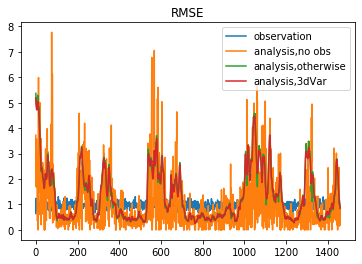

3dVar_abs_rmse_contour.jpg


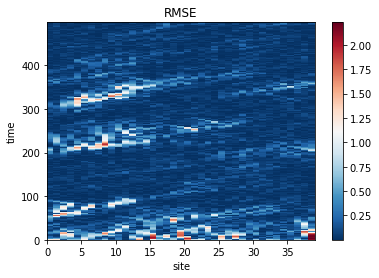

3dVar_abs_ncontour.jpg


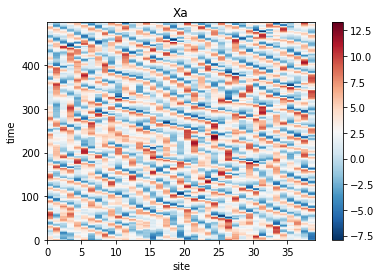

In [8]:
t = 1460
N = 40
h = 0.05 
F = 8.0

X = []
P = []
Pt2 = []
P2 = []
errcov = []

dataset = pd.read_csv("observation_data3.csv")
y = dataset.values
y = y.reshape(1460,N)
dataset2 = pd.read_csv("data3.csv")
Xt = dataset2.values.reshape(t,N)

#初期値
Xa = np.random.randn(N)
X0 = Xa
for j in range(500):
    Xa = Rungekutta4(X0,h,F)
    X0 = Xa
B = np.eye(N) * 0.2
#print(Xa)
#print(B)
#X.append(Xa
    

for k in range(t):
    #print(y[k])
    (Xf,Pf) = Forecast(Xa,B,y[k,:])
    Xa = Analysis(Xf,Pf,y[k,:],k)
    X.append(Xa)
    if(k%100==0):
        print(k)
    
Xa = np.array(X)
#print(Xa)

C1_ = []
C2_ = []
C3_ = []
Cs = []
Cb = []
H = np.eye(N)
H2 = H/2 + np.roll(H,1,axis=1)/2
for i in range(1460):
    X1 = Xa[i]
    X2 = Xt[i]
    X3 = sum((X2-X1)*(X2-X1))/N
    X4 = (X2-X1)*(X2-X1)/N
    Y1 = y[i]
    mask = Y1>=0
    mask_n = np.logical_not(mask)
    Y1 = Y1[mask]
    e = np.eye(N)
    p = int(np.sum(e[mask]))
    #Y2 = sum((H2@X2-Y1)*(H2@X2-Y1))/N
    Y2 = sum((H3(X2,mask)-Y1)*(H3(X2,mask)-Y1))/p
    mask1 = abs(X1)>1
    mask1_n = np.logical_not(mask1)
    #print(X1[mask1],X1[mask1_n],obsnum[i])
    X1sml = X1[mask_n]
    X1big = X1[mask]
    if(X1sml.shape[0]!=0):
        Xsml = sum((X1sml-X2[mask_n])*(X1sml-X2[mask_n]))/X1sml.shape[0]
    else:
        Xsml=0
    if(X1big.shape[0]!=0):
        Xbig = sum((X1big-X2[mask])*(X1big-X2[mask]))/X1big.shape[0]
    else:
        Xbig=0
    rmse1 = np.sqrt(X3)
    rmse2 = np.sqrt(Y2)
    rmse3 = np.sqrt(X4)
    rmses = np.sqrt(Xsml)
    rmseb = np.sqrt(Xbig)
    C1_.append(rmse1)
    C2_.append(rmse2)
    C3_.append(rmse3)
    Cs.append(rmses)
    Cb.append(rmseb)

ERR = np.array(C1_)
print(np.mean(ERR[200:]))
#plt.plot(C1,label="analysis,OI")
plt.plot(C2_,label="observation")
plt.plot(Cs,label="analysis,no obs")
plt.plot(Cb,label="analysis,otherwise")
plt.plot(C1_,label="analysis,3dVar")
#plt.plot(errcov,label="Pa")
plt.legend()
plt.title("RMSE")
#plt.savefig("3dVar_abs_obs2.jpg")
plt.show()
fname="3dVar_abs_rmse_contour.jpg"
print(fname)
Rmse = np.array(C3_).reshape(t,N)
X = np.array(X).reshape(t,N)
xs=np.arange(Rmse.shape[1])
time=np.arange(500)
plt.pcolor(xs,time,Rmse[:500],cmap='RdBu_r')
plt.colorbar()
plt.xlabel('site')
plt.ylabel('time')
plt.title("RMSE")
#plt.savefig(fname)
plt.show()
fname="3dVar_abs_ncontour.jpg"
print(fname)
plt.pcolor(xs,time,X[:500],cmap='RdBu_r')
plt.colorbar()
plt.xlabel('site')
plt.ylabel('time')
plt.title("Xa")
#plt.savefig(fname)
plt.show()